In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")

In [3]:
#  Load CSV from local path (download from Drive first)
SRC = "flight_delay_3m_clean_single_reason.csv" 
df = pd.read_csv(SRC)

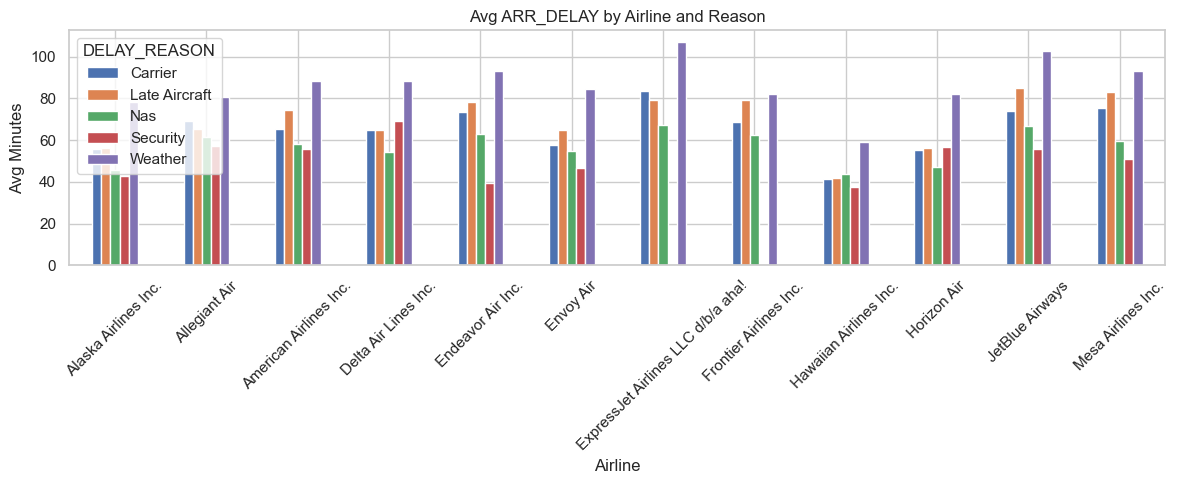

In [5]:
avg_pivot = df.groupby(["AIRLINE","DELAY_REASON"])["ARR_DELAY"].mean().unstack().fillna(0)
avg_pivot = avg_pivot.loc[avg_pivot.index[:12]]  # optionally limit to first 12 for readability
avg_pivot.plot(kind="bar", figsize=(12,5))
plt.title("Avg ARR_DELAY by Airline and Reason"); plt.xlabel("Airline"); plt.ylabel("Avg Minutes")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()


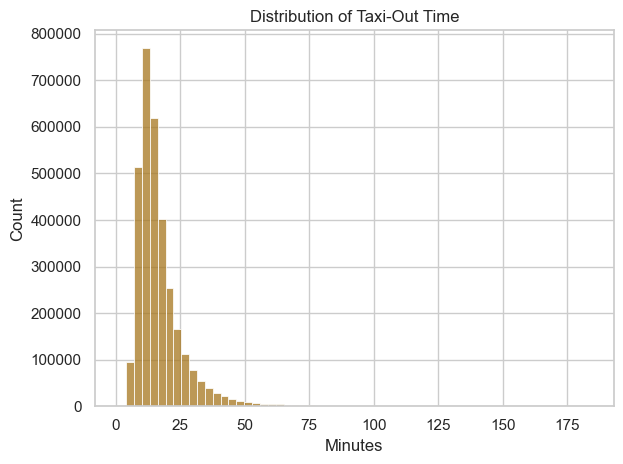

In [6]:
if "TAXI_OUT" in df.columns:
    sns.histplot(df["TAXI_OUT"].dropna(), bins=60, color="#a6761d")
    plt.title("Distribution of Taxi-Out Time"); plt.xlabel("Minutes")
    plt.tight_layout(); plt.show()


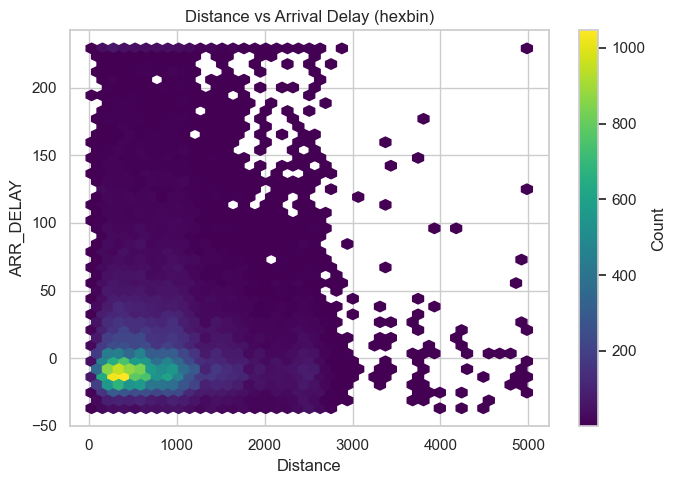

In [7]:
if "DISTANCE" in df.columns:
    sample = df.sample(min(50000, len(df)), random_state=42)
    plt.figure(figsize=(7,5))
    plt.hexbin(sample["DISTANCE"], sample["ARR_DELAY"], gridsize=40, cmap="viridis", mincnt=1)
    cb = plt.colorbar(); cb.set_label("Count")
    plt.title("Distance vs Arrival Delay (hexbin)"); plt.xlabel("Distance"); plt.ylabel("ARR_DELAY")
    plt.tight_layout(); plt.show()


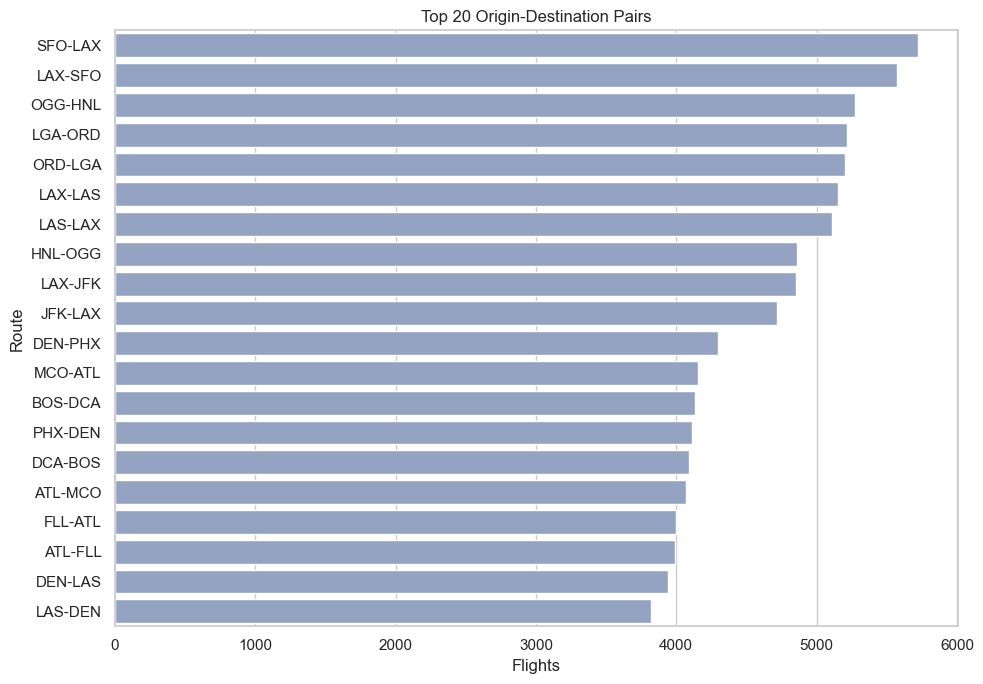

In [8]:
od_ct = df.groupby(["ORIGIN","DEST"]).size().sort_values(ascending=False).head(20)
od_ct = od_ct.rename("Flights").reset_index()
plt.figure(figsize=(10,7))
sns.barplot(data=od_ct, y=od_ct.apply(lambda r: f"{r['ORIGIN']}-{r['DEST']}", axis=1), x="Flights", color="#8da0cb")
plt.title("Top 20 Origin-Destination Pairs"); plt.xlabel("Flights"); plt.ylabel("Route")
plt.tight_layout(); plt.show()


In [9]:
# If FL_DATE exists, reparse datetime
if "FL_DATE" in df.columns:
    df["FL_DATE"] = pd.to_datetime(df["FL_DATE"], errors="coerce")


In [10]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import plotly.express as px
sns.set_theme(style="whitegrid")


In [11]:
df["STATE"] = df["ORIGIN_CITY"].str.extract(r",\\s*([A-Z]{2})$")
state_avg = df.groupby("STATE")["ARR_DELAY"].mean().reset_index()

import plotly.express as px
fig = px.choropleth(state_avg, locations="STATE", locationmode="USA-states",
                    color="ARR_DELAY", scope="usa",
                    color_continuous_scale="RdYlGn_r",
                    title="Average Arrival Delay by State")
fig.show()


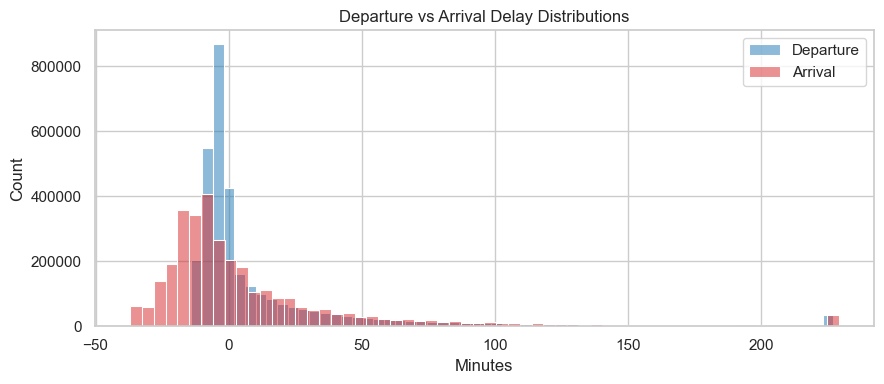

In [12]:
plt.figure(figsize=(9,4))
sns.histplot(df["DEP_DELAY"].dropna(), bins=60, color="#1f77b4", alpha=0.5, label="Departure")
sns.histplot(df["ARR_DELAY"].dropna(), bins=60, color="#d62728", alpha=0.5, label="Arrival")
plt.legend(); plt.title("Departure vs Arrival Delay Distributions")
plt.xlabel("Minutes"); plt.tight_layout(); plt.show()


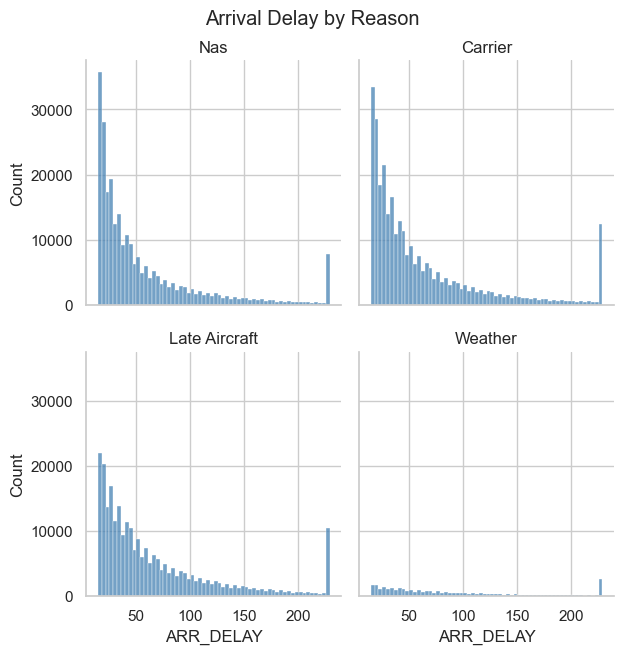

In [13]:
topR = df["DELAY_REASON"].value_counts().head(4).index
g = sns.FacetGrid(df[df["DELAY_REASON"].isin(topR)], col="DELAY_REASON", col_wrap=2, height=3.2, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="ARR_DELAY", bins=60, color="steelblue")
g.set_titles("{col_name}"); g.fig.suptitle("Arrival Delay by Reason", y=1.02); plt.show()


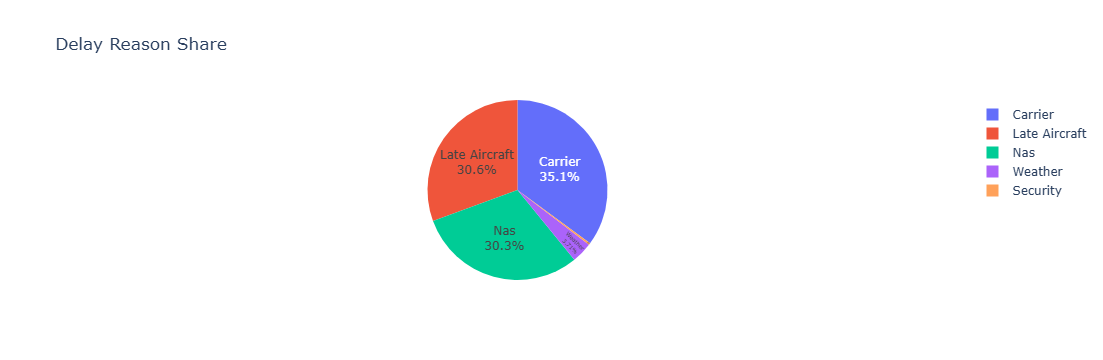

In [14]:
share = df["DELAY_REASON"].value_counts().reset_index()
share.columns = ["Reason","Count"]
fig = px.pie(share, names="Reason", values="Count", hole=0, title="Delay Reason Share")
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()


In [15]:
delayed = df[df["ARR_DELAY"] > 0]
air_share = delayed["AIRLINE"].value_counts().reset_index()
air_share.columns = ["Airline","Count"]
fig = px.pie(air_share, names="Airline", values="Count", hole=0.4, title="Delayed Flights by Airline")
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()


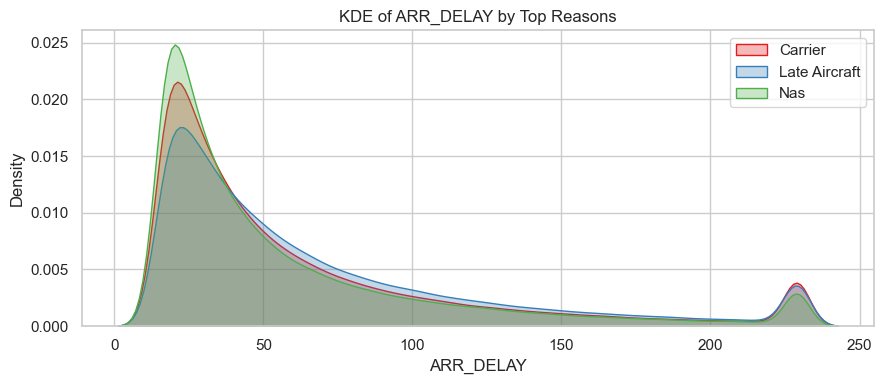

In [16]:
top3 = df["DELAY_REASON"].value_counts().head(3).index
plt.figure(figsize=(9,4))
for r, col in zip(top3, ["#e41a1c","#377eb8","#4daf4a"]):
    sns.kdeplot(df.loc[df["DELAY_REASON"]==r, "ARR_DELAY"].dropna(), label=r, fill=True, alpha=0.3, color=col)
plt.title("KDE of ARR_DELAY by Top Reasons"); plt.legend(); plt.tight_layout(); plt.show()


In [17]:
topA = df["AIRLINE"].value_counts().head(10).index
tmp = df[df["AIRLINE"].isin(topA)]
tree = tmp.groupby(["AIRLINE","DELAY_REASON"]).size().reset_index(name="Flights")
fig = px.treemap(tree, path=["AIRLINE","DELAY_REASON"], values="Flights", title="Treemap: Delay Reasons by Airline")
fig.show()


In [18]:
sun = df.groupby(["AIRLINE","ORIGIN","DEST"]).size().reset_index(name="Flights")
fig = px.sunburst(sun, path=["AIRLINE","ORIGIN","DEST"], values="Flights", title="Sunburst: Airline → Origin → Dest")
fig.show()


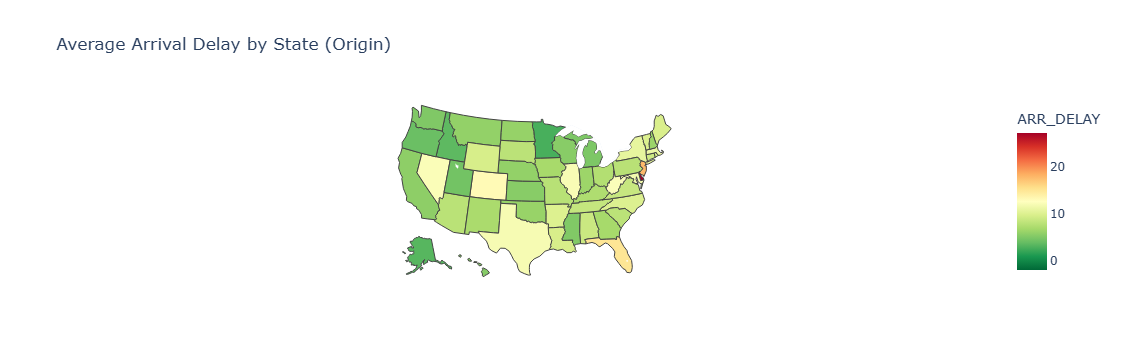

In [19]:
# Ensure FL_DATE parsed and ARR_DELAY numeric beforehand
ff = df.copy()
ff["STATE"] = ff["ORIGIN_CITY"].str.extract(r",\s*([A-Z]{2})$")
state_avg = (ff.groupby("STATE")["ARR_DELAY"]
               .mean()
               .reset_index()
               .dropna(subset=["STATE"]))

fig = px.choropleth(
    state_avg, locations="STATE", locationmode="USA-states",
    color="ARR_DELAY", scope="usa",
    color_continuous_scale="RdYlGn_r",
    title="Average Arrival Delay by State (Origin)"
)
fig.show()